In [35]:
'''
Script to plot the overall epidemiology of USA and Illinois
Data for US pulled from CDC
Data for Illinois pulled from IDPH and HHS
'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

#data pulled from cdc.gov
cases = pd.read_csv('/Users/tlh4362/Desktop/data_table_for_daily_case_trends__the_united_states.csv') 
vax = pd.read_csv('/Users/tlh4362/Desktop/COVID-19_Vaccinations_in_the_United_States_Jurisdiction.csv')
deaths = pd.read_csv('/Users/tlh4362/Desktop/data_table_for_daily_death_trends__the_united_states.csv') 

hosp = pd.read_csv('/Users/tlh4362/Desktop/hosp_data_table_for_daily_case_trends__the_united_states.csv')



### Plotting Epidemiology for US

In [36]:
hosp['Date'] = pd.to_datetime(hosp['testDate'])
hosp = hosp.sort_values(by = 'Date', ascending = True)


In [37]:
#calculating the 7-day moving average
sdma_hosp = []
date_hosp = []
for i in range(len(hosp)):
    if i+7 == hosp.shape[0]:
        break
    else:
        if i >= 7:
            start = hosp['Date'].iloc[i]
            end = hosp['Date'].iloc[i+7]
            sdma_hosp.append(hosp['hosp_admission'].iloc[i:i+7].sum()/7)
            date_hosp.append(end)
        else:
            end = hosp['Date'].iloc[i]
            sdma_hosp.append(hosp['hosp_admission'].iloc[0:i].mean())
            date_hosp.append(end)
final = pd.DataFrame()
final['Date'] = pd.to_datetime(date_hosp)
final['Hospitalization'] = sdma_hosp
final = pd.merge(final, hosp.loc[:,['Date','7-Day Moving Avg']], on = 'Date', how = 'left')

final = final.rename({'7-Day Moving Avg':'Cases'}, axis = 1)


In [38]:
vax['Date'] = pd.to_datetime(vax['Date'])
vax = vax.sort_values(by = 'Date', ascending = True)


In [39]:
usa_vax = vax[vax['Location']=='US']
for i in range(len(usa_vax)):
    date = usa_vax['Date'].iloc[i]
    cum_prop = usa_vax['Series_Complete_Yes'].iloc[i]/330000000 #estimated total usa population
    idx = final[final['Date']==date].index
    final.at[idx, 'Cumulative Fully Vaccinated'] = cum_prop


In [40]:
final['Cumulative Fully Vaccinated'] = final['Cumulative Fully Vaccinated'].fillna(0)

In [41]:
deaths['Date'] = pd.to_datetime(deaths['testDate'])

In [42]:
final = pd.merge(final, deaths.loc[:,['Date','7-Day Moving Avg']], on = 'Date', how = 'left')
final = final.rename({'7-Day Moving Avg':'Deaths'}, axis = 1)


In [43]:
final = final.sort_values(by = 'Date')

In [44]:
final = final[(final['Date'] >= pd.to_datetime('2020-03-17')) & (final['Date'] <= pd.to_datetime('2022-03-17'))]

Text(0.5, 1.0, 'USA Epidemiology')

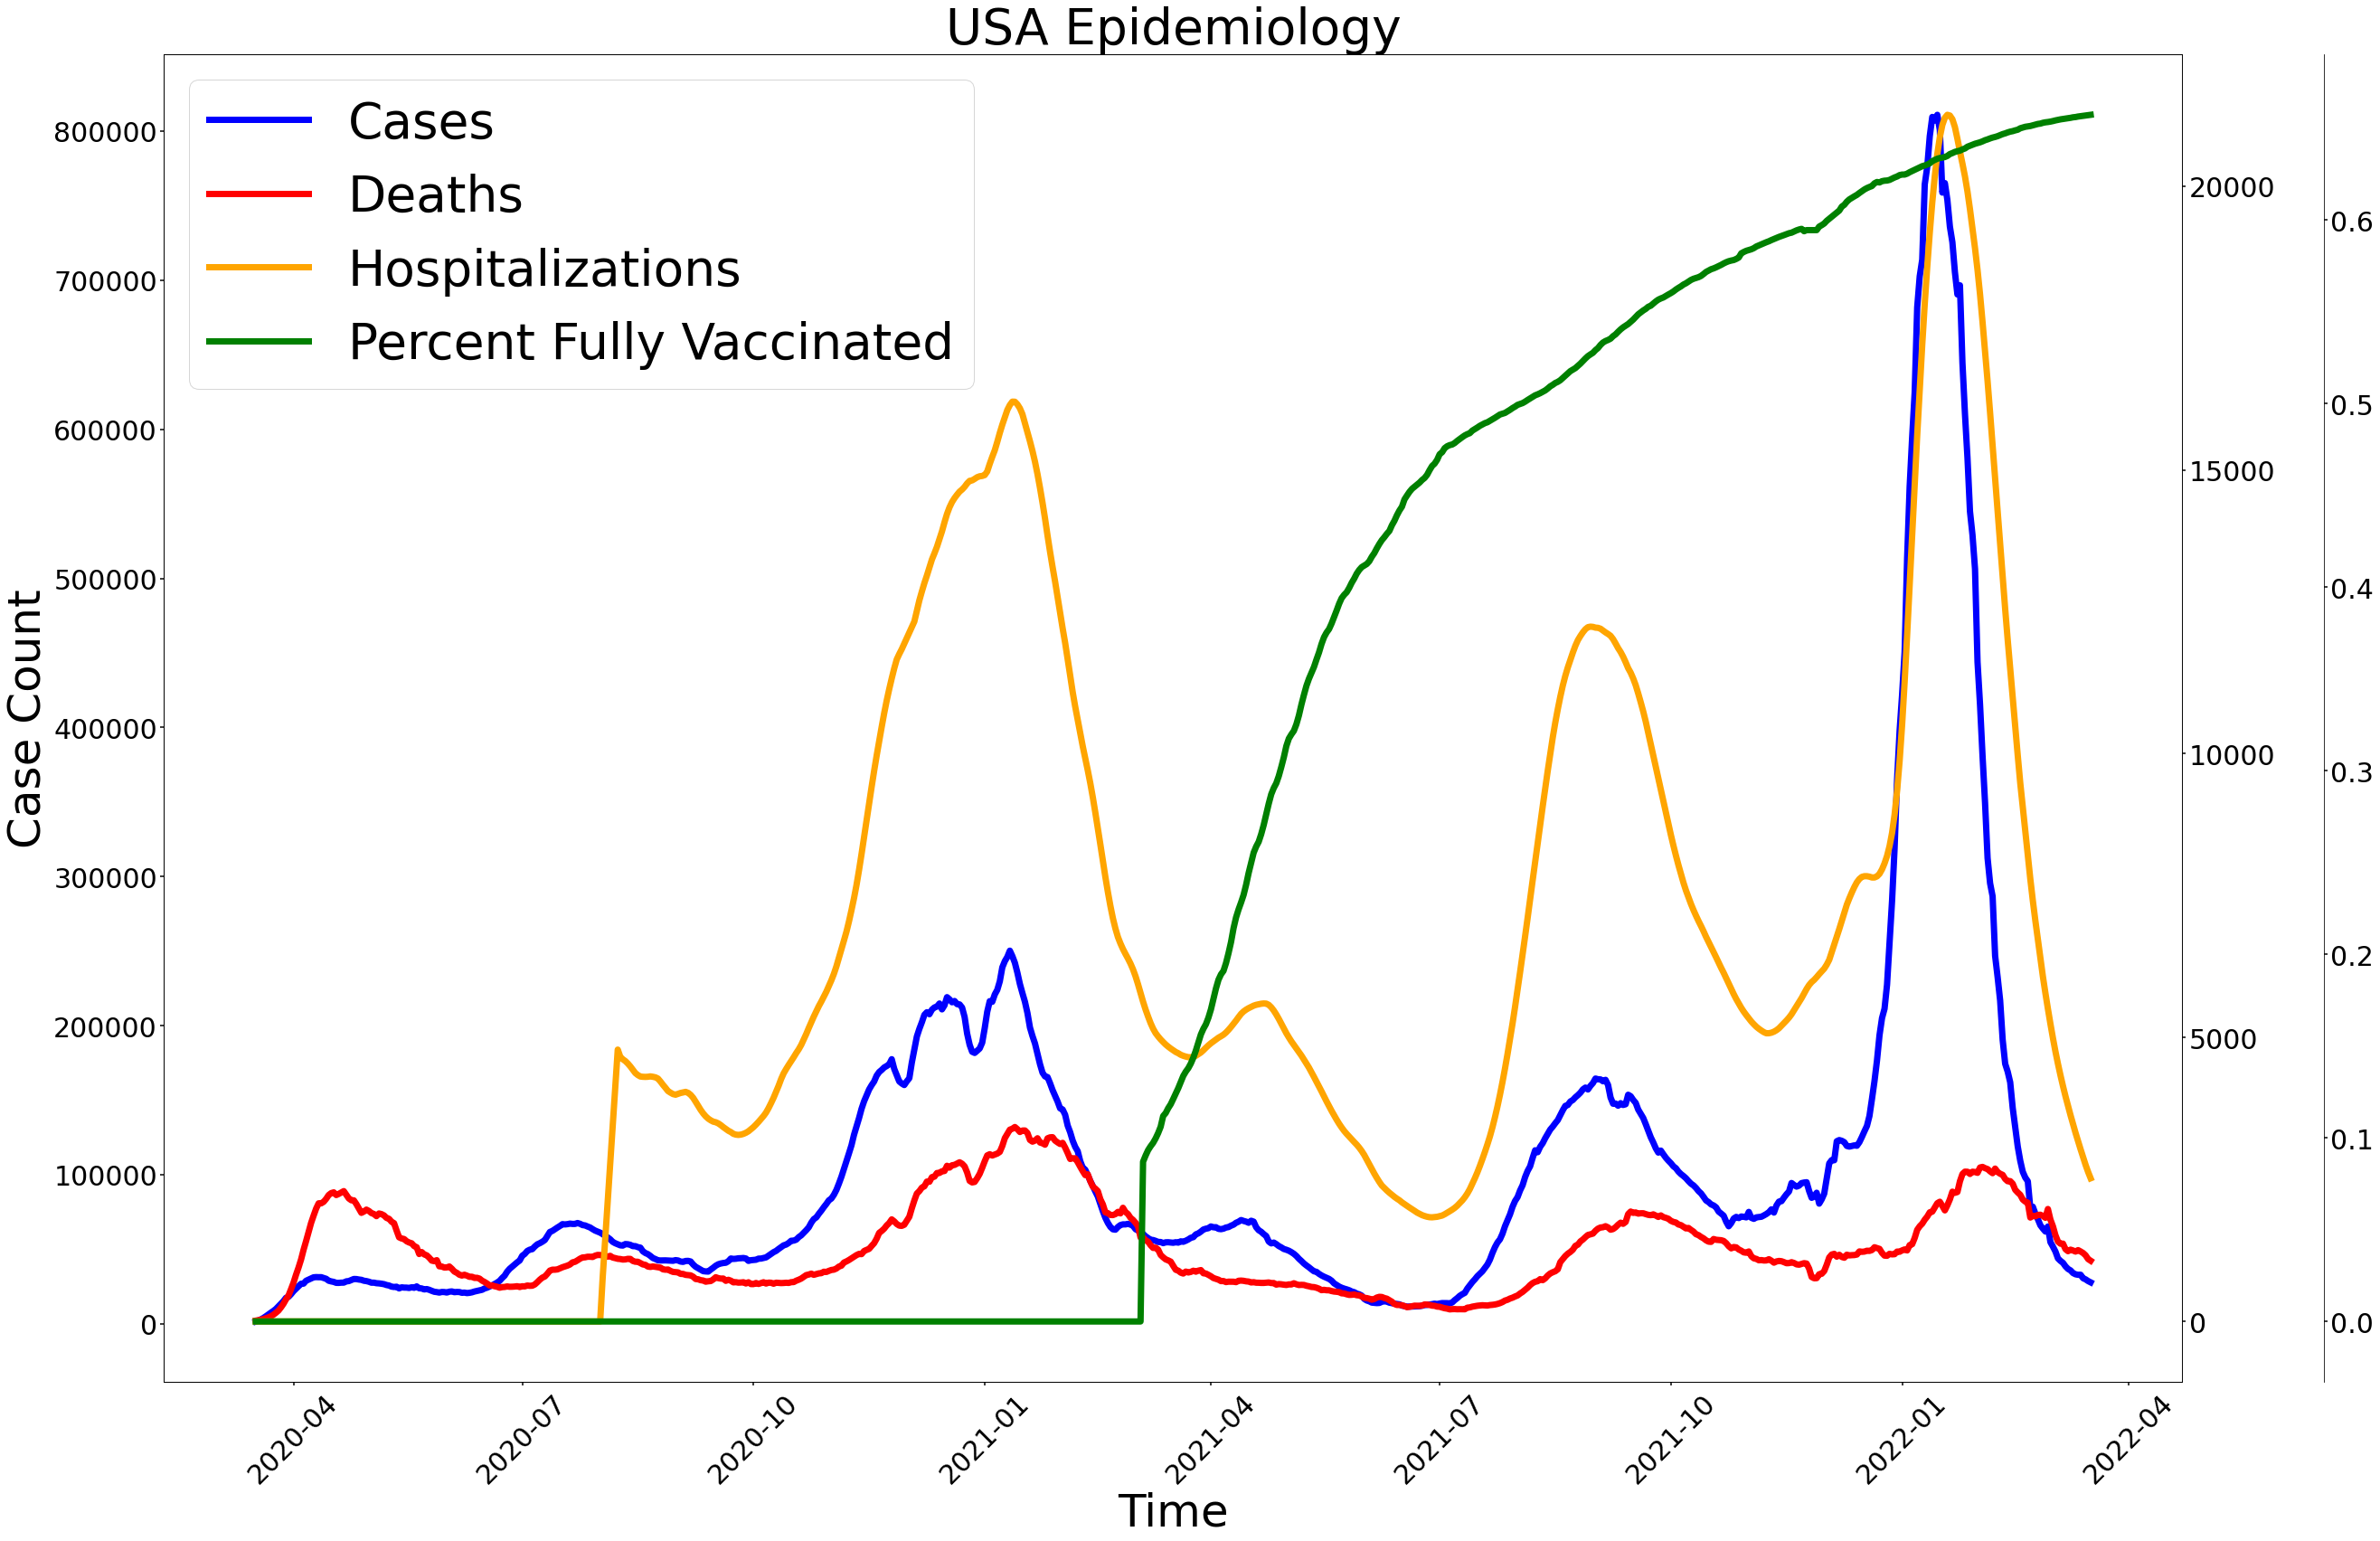

In [45]:

fig, ax = plt.subplots(figsize = [40,27])
ax2 = ax.twinx()
ax3 = ax.twinx()
ax3.spines['right'].set_position(('axes', 1.07))


p1, = ax.plot(final['Date'],final['Cases'], label = 'Cases', color = 'blue', linewidth=7)
p21, = ax2.plot(final['Date'],final['Deaths'],  label = 'Deaths', color = 'red', linewidth=7)
p22, = ax2.plot(final['Date'],final['Hospitalization'], label = 'Hospitalizations', color = 'orange', linewidth=7)
p3, = ax3.plot(final['Date'], final['Cumulative Fully Vaccinated'],  label = 'Percent Fully Vaccinated', color = 'green', linewidth=7)

ax.set_xlabel('Time', fontsize = 50)
ax.set_ylabel('Case Count', fontsize = 50)

tkw = dict(size=4, width=1.5, labelsize = 30)
ax.tick_params(axis='y',  **tkw)
ax.tick_params(axis='x', rotation = 45, **tkw)

ax2.tick_params(axis='y',  **tkw)
ax3.tick_params(axis='y',  **tkw)

ax.legend(handles = [p1, p21, p22, p3], fontsize = 55)

plt.title('USA Epidemiology', fontsize = 55)

# plt.savefig('/Users/tlh4362/Desktop/fig_s1_usa.eps', format = 'eps')


### Plotting Epidemiology for Illinois

In [46]:
#data from IDPH and HHS

cases = pd.read_csv('/Users/tlh4362/Desktop/illinois_cases.csv')
vax = pd.read_csv('/Users/tlh4362/Desktop/illinois_vax.csv')
hosp = pd.read_csv('/Users/tlh4362/Desktop/COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State_Timeseries.csv')

In [47]:
#filtering dataset for only Illinois

cases['Date'] = pd.to_datetime(cases['testDate'])
finaldf = cases.loc[:,['Date', 'cases_7_day_rolling_avg', 'deaths_7_day_rolling_avg']]
vax['Date'] = pd.to_datetime(vax['Report_Date'])
finaldf = pd.merge(finaldf, vax.loc[:,['Date', 'PctFullyVaccinatedPopulation']], how = 'left')

hosp_il = hosp[hosp['state']=='IL']
hosp_il['Date'] = pd.to_datetime(hosp_il['date'])
hosp_il = hosp_il.sort_values(by = 'date')

<ipython-input-47-b65eb4160e30>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hosp_il['Date'] = pd.to_datetime(hosp_il['date'])


In [48]:
#filtering dataset for only Illinois

cases['Date'] = pd.to_datetime(cases['testDate'])
finaldf = cases.loc[:,['Date', 'cases_7_day_rolling_avg', 'deaths_7_day_rolling_avg']]
vax['Date'] = pd.to_datetime(vax['Report_Date'])
finaldf = pd.merge(finaldf, vax.loc[:,['Date', 'PctFullyVaccinatedPopulation']], how = 'left')

hosp_il = hosp[hosp['state']=='IL']
hosp_il['Date'] = pd.to_datetime(hosp_il['date'])
hosp_il = hosp_il.sort_values(by = 'date')

<ipython-input-48-b65eb4160e30>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hosp_il['Date'] = pd.to_datetime(hosp_il['date'])


Text(0.5, 1.0, 'IL Epidemiology')

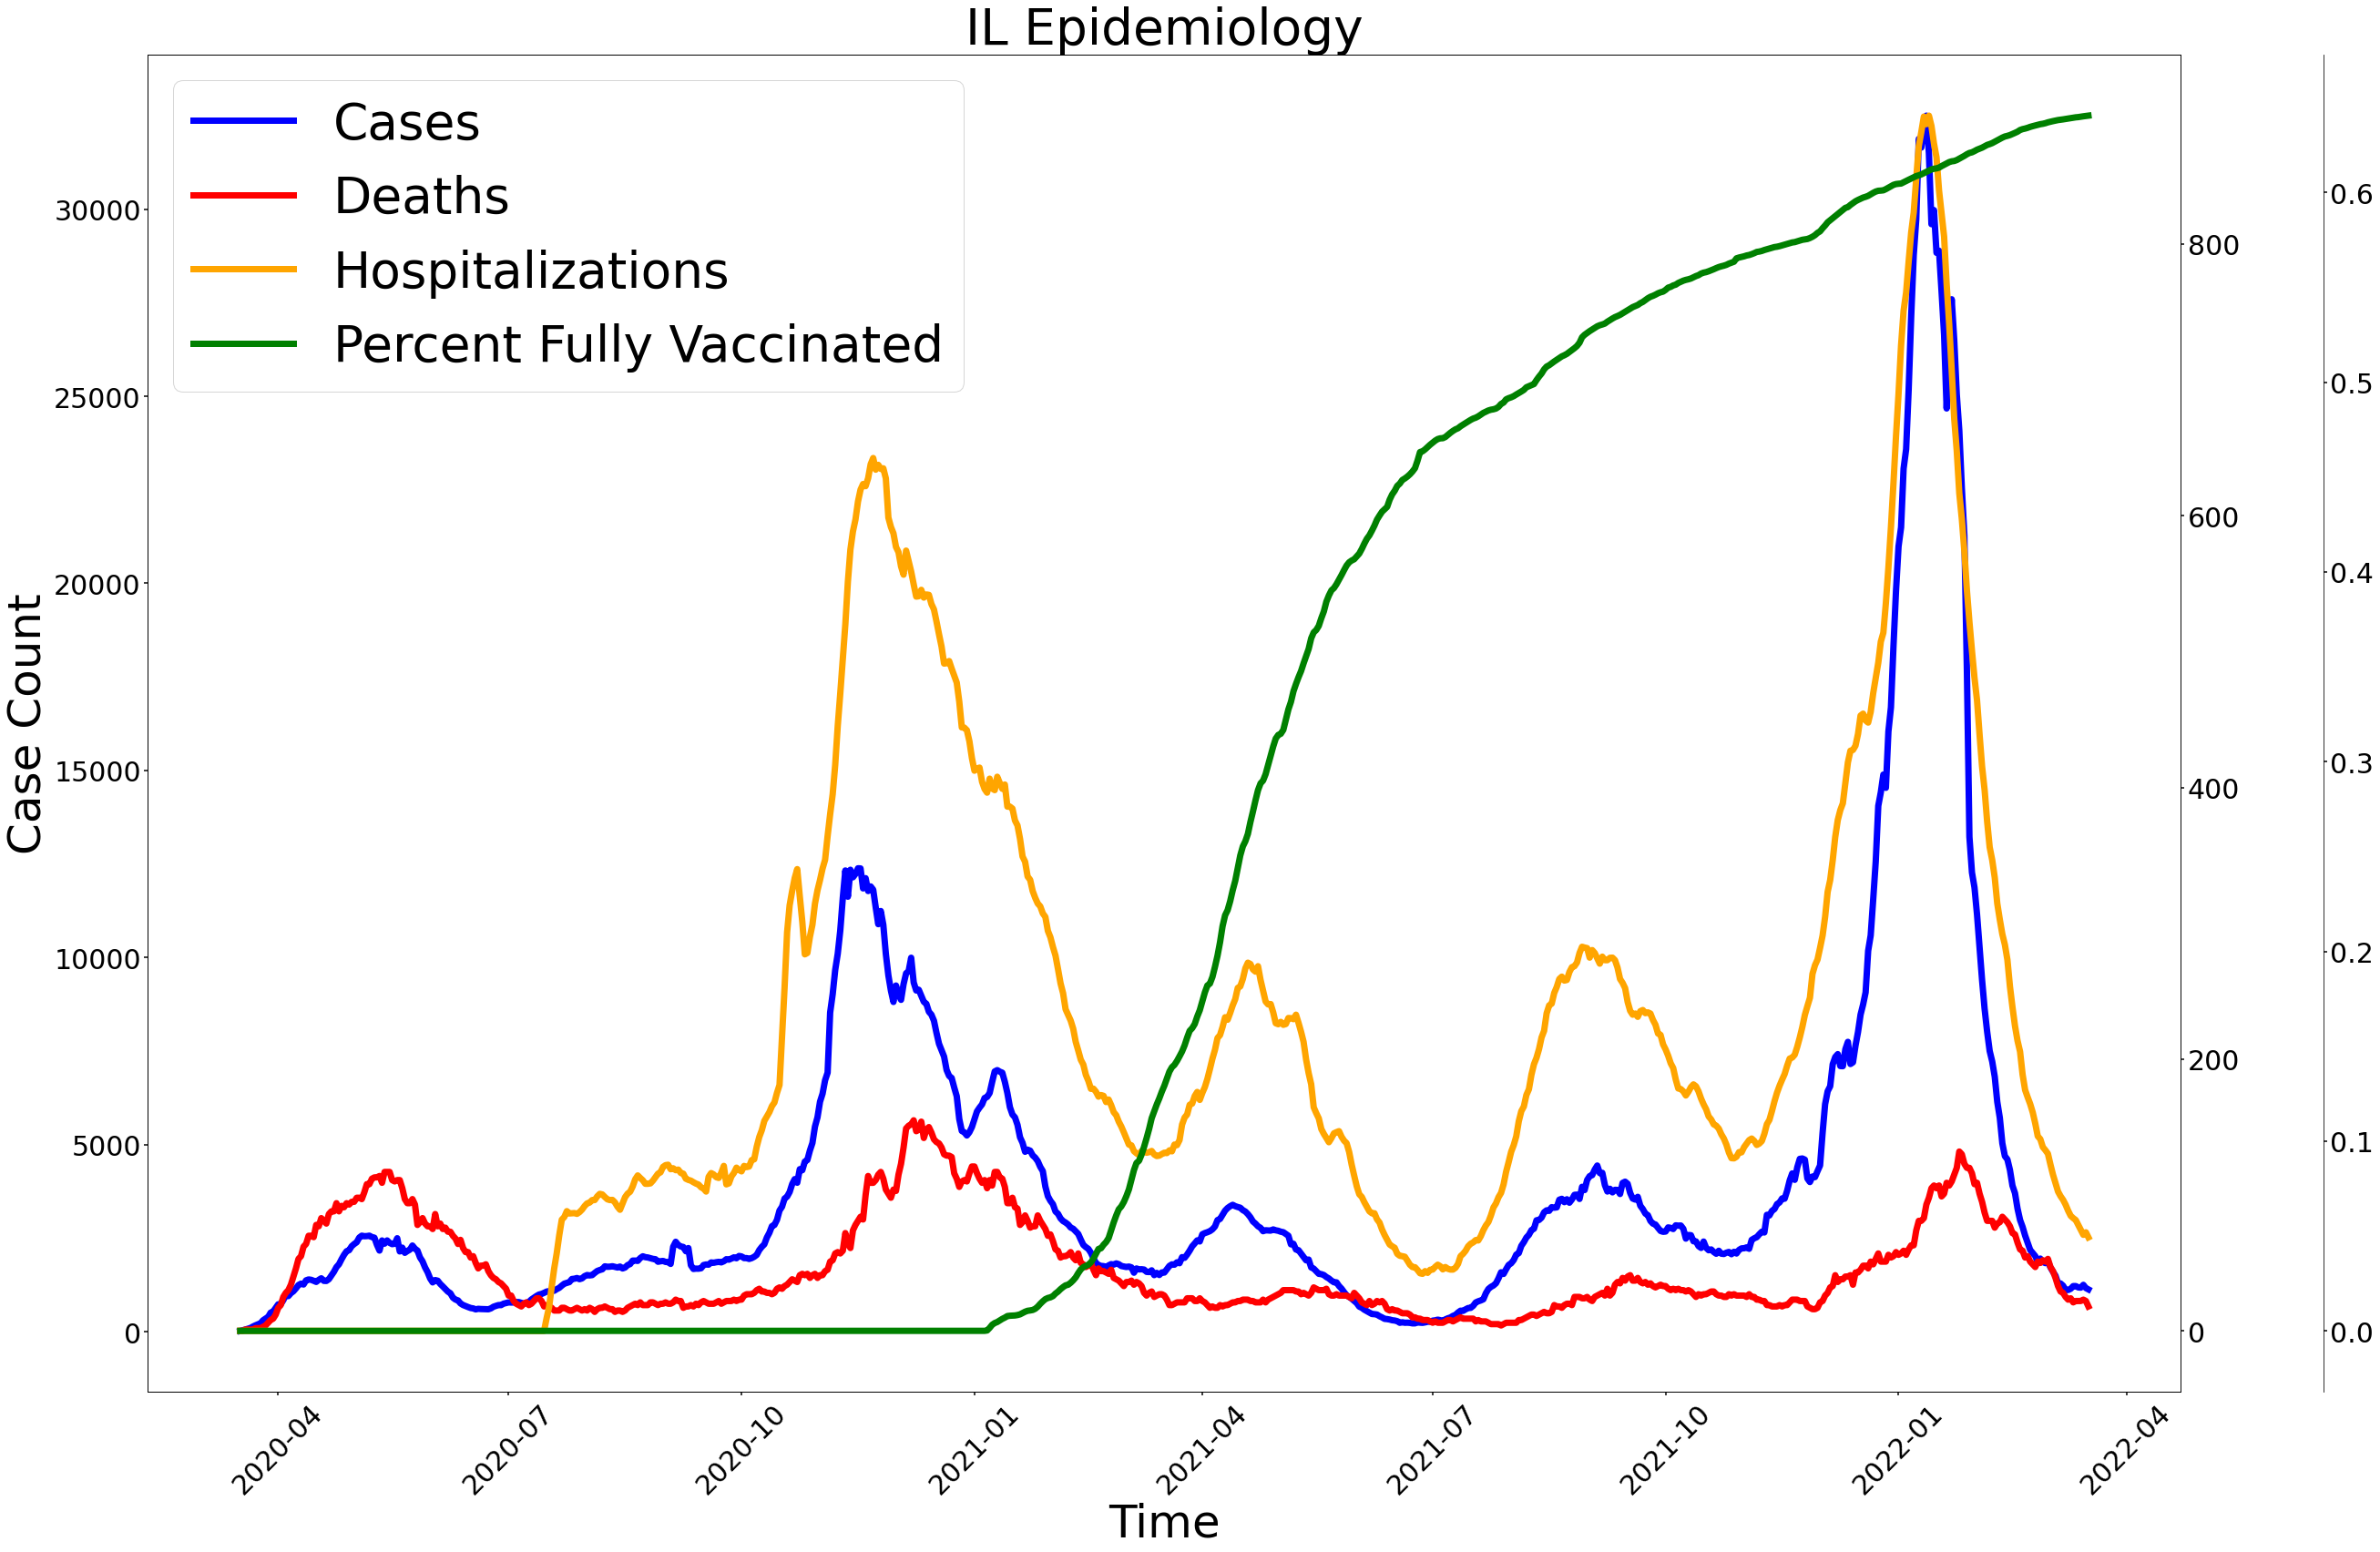

In [49]:
#calculating the 7 day moving average
sdma_hosp = []
date_hosp = []
hosp_df = pd.DataFrame()
for i in range(len(hosp_il)):
    if i+7 == hosp_il.shape[0]:
        break
    else:
        if i >= 7:
            start = hosp_il['Date'].iloc[i]
            end = hosp_il['Date'].iloc[i+7]
            sdma_hosp.append(hosp_il['previous_day_admission_adult_covid_confirmed'].iloc[i:i+7].sum()/7)
            date_hosp.append(end)
        else:
            end = hosp_il['Date'].iloc[i]
            sdma_hosp.append(hosp_il['previous_day_admission_adult_covid_confirmed'].iloc[0:i].mean())
            date_hosp.append(end)
hosp_df['Date'] = date_hosp
hosp_df['Hosp'] = sdma_hosp
finaldf = pd.merge(finaldf, hosp_df, how = 'left')

#filtering for March 17th 2020 to March 17th 2022
finaldf = finaldf[(finaldf['Date'] >= pd.to_datetime('2020-03-17')) & (finaldf['Date'] <= pd.to_datetime('2022-03-17'))]

finaldf = finaldf.sort_values(by = 'Date')

finaldf['PctFullyVaccinatedPopulation'] = finaldf['PctFullyVaccinatedPopulation'].fillna(0)

fig, ax = plt.subplots(figsize = [40,27])
ax2 = ax.twinx()
ax3 = ax.twinx()
ax3.spines['right'].set_position(('axes', 1.07))


p1, = ax.plot(finaldf['Date'],finaldf['cases_7_day_rolling_avg'], label = 'Cases', color = 'blue', linewidth=7)
p21, = ax2.plot(finaldf['Date'],finaldf['deaths_7_day_rolling_avg'],  label = 'Deaths', color = 'red', linewidth=7)
p22, = ax2.plot(finaldf['Date'],finaldf['Hosp'], label = 'Hospitalizations', color = 'orange', linewidth=7)

p3, = ax3.plot(finaldf['Date'], finaldf['PctFullyVaccinatedPopulation'],  label = 'Percent Fully Vaccinated', color = 'green', linewidth=7)

ax.set_xlabel('Time', fontsize = 50)
ax.set_ylabel('Case Count', fontsize = 50)

tkw = dict(size=4, width=1.5, labelsize = 30)
ax.tick_params(axis='y',  **tkw)
ax.tick_params(axis='x', rotation = 45, **tkw)

ax2.tick_params(axis='y',  **tkw)
ax3.tick_params(axis='y',  **tkw)

ax.legend(handles = [p1, p21, p22, p3], fontsize = 55)

plt.title('IL Epidemiology', fontsize = 55)

# plt.savefig('/Users/tlh4362/Desktop/fig_s1_il.eps', format = 'eps')
